ℹ️ SciPy no está instalado: usaré interpolación lineal.


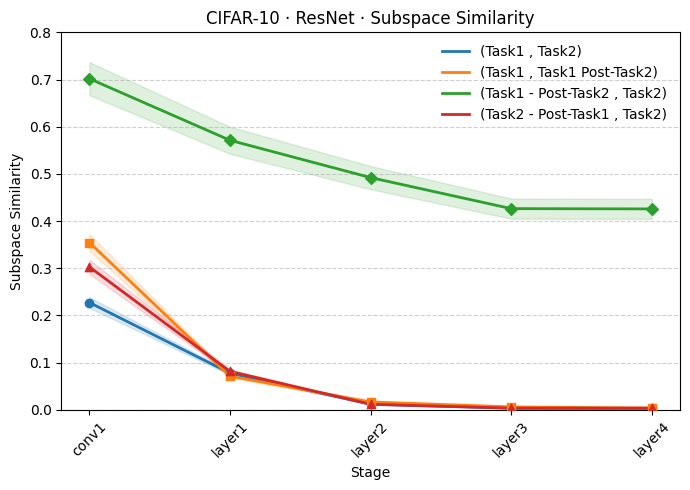

✅ Figura guardada como 'subspace_similarity.png'


In [13]:
import json
import matplotlib.pyplot as plt
import numpy as np

try:
    from scipy.interpolate import CubicSpline
    _CS = True
except ImportError:
    print("ℹ️ SciPy no está instalado: usaré interpolación lineal.")
    _CS = False

# ────────────────────────────────────────────────────────
# 1. Archivos JSON  ➜  etiqueta para la leyenda
# ────────────────────────────────────────────────────────
files = {
    "(Task1 , Task2)":                             "sim_t1ck1_vs_t2ck2d.json",
    "(Task1 , Task1 Post-Task2)":                  "sim_t1ck1_vs_t1ck2d.json",
    "(Task1 - Post-Task2 , Task2)":                "sim_t1ck2_vs_t2ck2.json",
    "(Task2 - Post-Task1 , Task2)":                "sim_t2ck1_vs_t2ck2d.json"
}

# ────────────────────────────────────────────────────────
# 2. Cargar datos y fijar orden de capas
# ────────────────────────────────────────────────────────
layers_full, curves = None, {}
for label, path in files.items():
    with open(path) as f:
        data = json.load(f)
    if layers_full is None:
        layers_full = list(data["layers"].keys())
    curves[label] = np.array([data["layers"][k] for k in layers_full])

orig_x  = np.arange(len(layers_full))
dense_x = np.linspace(orig_x[0], orig_x[-1], len(layers_full) * 3 - 2)
layers_short = [l.replace("backbone.", "") for l in layers_full]

# ────────────────────────────────────────────────────────
# 3. Configuración de estilo
# ────────────────────────────────────────────────────────
markers = ["o", "s", "D", "^"]
colors  = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

plt.figure(figsize=(7, 5))

for idx, (label, y_vals) in enumerate(curves.items()):
    color  = colors[idx % len(colors)]
    marker = markers[idx % len(markers)]

    # Suavizado
    if _CS and len(y_vals) >= 3:
        y_dense = CubicSpline(orig_x, y_vals)(dense_x)
    else:
        y_dense = np.interp(dense_x, orig_x, y_vals)

    plt.plot(dense_x, y_dense, lw=2, label=label, color=color)
    plt.scatter(orig_x, y_vals, marker=marker, color=color, zorder=3)

    # Banda ±5 %
    plt.fill_between(dense_x,
                     y_dense * 0.95,
                     y_dense * 1.05,
                     color=color, alpha=0.15)

# ────────────────────────────────────────────────────────
# 4. Ejes, título y leyenda
# ────────────────────────────────────────────────────────
plt.xticks(orig_x, layers_short, rotation=45)
plt.ylim(0, 0.8)
plt.xlabel("Stage")
plt.ylabel("Subspace Similarity")
plt.title("CIFAR-10 · ResNet · Subspace Similarity")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.legend(frameon=False)
plt.tight_layout()

# ────────────────────────────────────────────────────────
# 5. Guardar y mostrar
# ────────────────────────────────────────────────────────
plt.savefig("subspace_similarity.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Figura guardada como 'subspace_similarity.png'")


¿Que significan estos resultados?

1. Las representaciones entre la tarea 1 y tarea 2 no se rehusan, es decir, cambia completamente el espacio de representaciones.
2. Para la tarea 1 junto con la tarea dos, en el mismo modelo, estas no se superponen, es decir, son separables?

Es importante entender que significa que se superpongan o que sean muy distintos.
Ellos dicen como, se rehusan caracteristicas.
Pero aca vemos que no se rehusan caracteristicas ni por tarea ni por modelo.